In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import missingno as mno
import seaborn as sns # data visualisation


In [2]:
import warnings
warnings.simplefilter("ignore", category=UserWarning)


In [2]:
# path of this file
# Import the dataframe containing all data (ductal + lobular)
dataset = pd.read_csv(("real_patients_enrichments.csv"), index_col=0)
dataset['NES'] = pd.to_numeric(dataset['NES'], errors='coerce')
df = dataset

## Explore the dataset

In [4]:
print("Data Set - Size:", dataset.shape[0])

Data Set - Size: 24882


In [5]:
print("Number of patients:", dataset.shape[0]/29)

Number of patients: 858.0


In [6]:
dataset.dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

In [7]:
dataset.columns

Index(['Patient', 'Cancer_Type', 'Stage', 'TrajectoryID', 'Pathway', 'NES',
       'FDR q-val', 'Regulation'],
      dtype='object')

In [17]:
dataset.describe()

,NES,FDR q-val,Regulation
count,18712.000000,18876.000000,18712.000000
mean,-0.077722,0.689207,0.118159
std,1.210529,0.376563,0.350736
min,-2.017940,0.000000,-1.000000
25%,-1.047010,0.385795,0.000000
50%,-0.623473,0.907777,0.000000
75%,0.910668,1.000000,0.000000
max,3.859832,1.000000,1.000000


In [18]:
dataset.head(8)

,Patient,Cancer_Type,Stage,TrajectoryID,Pathway,NES,FDR q-val,Regulation
0,TCGA-5L-AAT0-01,lobular,II,[49],DEVELOPMENTAL BIOLOGY,-0.927464,0.877037,0.0
1,TCGA-5L-AAT0-01,lobular,II,[49],CIRCADIAN CLOCK,-1.416242,0.630773,0.0
2,TCGA-5L-AAT0-01,lobular,II,[49],MUSCLE CONTRACTION,-1.327902,0.736391,0.0
3,TCGA-5L-AAT0-01,lobular,II,[49],TRANSPORT OF SMALL MOLECULES,-1.320360,0.574472,0.0
4,TCGA-5L-AAT0-01,lobular,II,[49],IMMUNE SYSTEM,NaN,NaN,NaN
5,TCGA-5L-AAT0-01,lobular,II,[49],NEURONAL SYSTEM,-1.219485,0.737521,0.0
6,TCGA-5L-AAT0-01,lobular,II,[49],CELL-CELL COMMUNICATION,-1.184381,0.714842,0.0
7,TCGA-5L-AAT0-01,lobular,II,[49],REPRODUCTION,-1.156503,0.682508,0.0


In [23]:
print(dataset.dtypes)  # Check data types of columns
print(dataset.isnull().sum())  # Check for missing values

Patient          object
Cancer_Type      object
Stage            object
TrajectoryID     object
Pathway          object
NES             float64
FDR q-val       float64
Regulation      float64
dtype: object
Patient            0
Cancer_Type        0
Stage              0
TrajectoryID       0
Pathway            0
NES             6170
FDR q-val       6006
Regulation      6170
dtype: int64


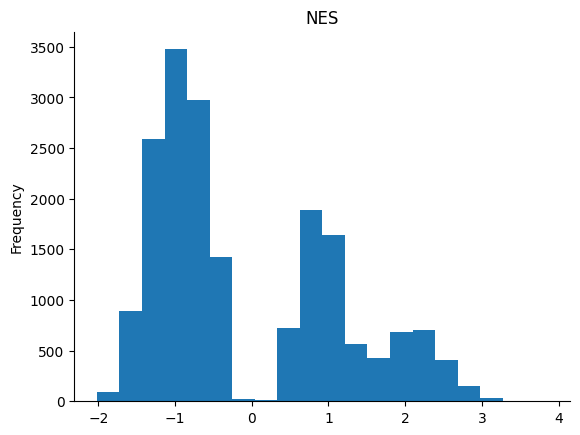

In [21]:
# @title NES

from matplotlib import pyplot as plt
dataset['NES'].plot(kind='hist', bins=20, title='NES')
plt.gca().spines[['top', 'right',]].set_visible(False)

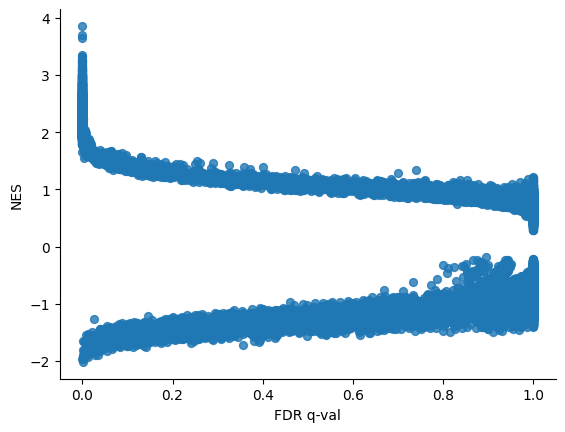

In [20]:
# @title FDR q-val vs NES
from matplotlib import pyplot as plt

# Plotting
dataset.plot(kind='scatter', x='FDR q-val', y='NES', s=32, alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel('FDR q-val')  # Ensuring that axis labels are properly set
plt.ylabel('NES')

plt.show()


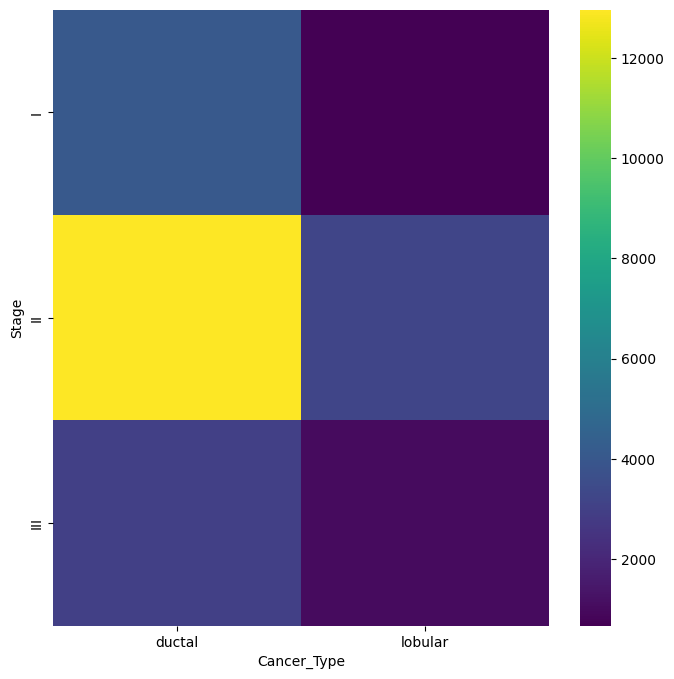

In [ ]:
# @title Cancer_Type vs Stage

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Stage'].value_counts()
    for x_label, grp in dataset.groupby('Cancer_Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Cancer_Type')
_ = plt.ylabel('Stage')

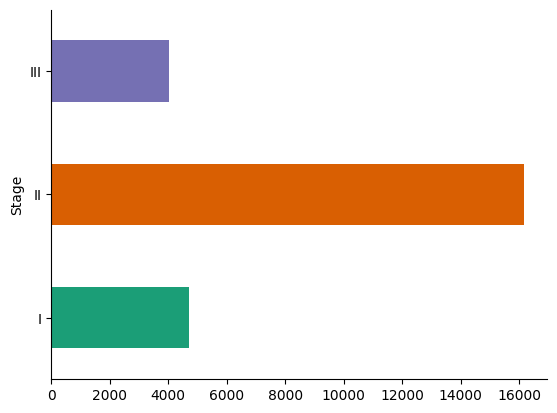

In [ ]:
# @title Stage

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Stage').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

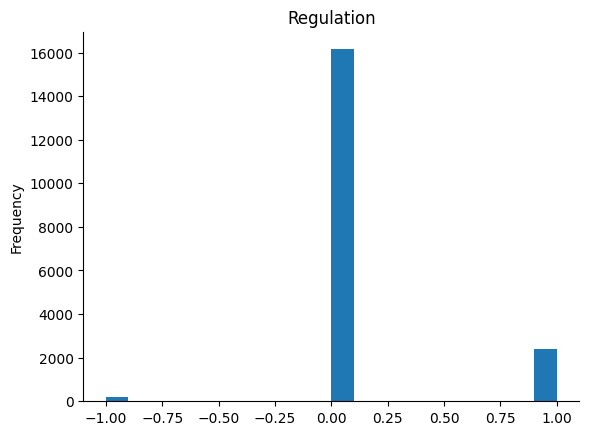

In [ ]:
# @title Regulation

from matplotlib import pyplot as plt
dataset['Regulation'].plot(kind='hist', bins=20, title='Regulation')
plt.gca().spines[['top', 'right',]].set_visible(False)

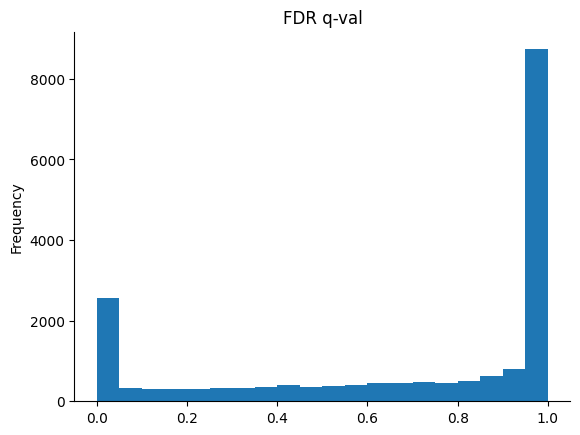

In [ ]:
# @title FDR q-val

from matplotlib import pyplot as plt
dataset['FDR q-val'].plot(kind='hist', bins=20, title='FDR q-val')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.isnull().sum()

Patient            0
Cancer_Type        0
Stage              0
TrajectoryID       0
Pathway            0
NES             6006
FDR q-val       6006
Regulation      6170
dtype: int64

In [ ]:
null_values_in_row = dataset.isnull().sum(axis=1)

# Count the number of rows with at least one null value
rows_with_null_count = (null_values_in_row > 0).sum()

print(f"Number of rows with at least one null value: {rows_with_null_count}")

Number of rows with at least one null value: 6170


In [ ]:
columns_of_interest = ['NES', 'FDR q-val', 'Regulation']

rows_with_all_null_values = dataset[dataset[columns_of_interest].isnull().all(axis=1)]

unique_patients_with_all_null_values = rows_with_all_null_values['Patient'].unique()
print(f"Number of patients who have at least one null value {len(unique_patients_with_all_null_values)}")
print(f"Number of rows with null values in at all the specified columns: {len(rows_with_all_null_values)}")

Number of patients who have at least one null value 858
Number of rows with null values in at all the specified columns: 6006


**So there is no patient with all his data in every pathway**

<Axes: >

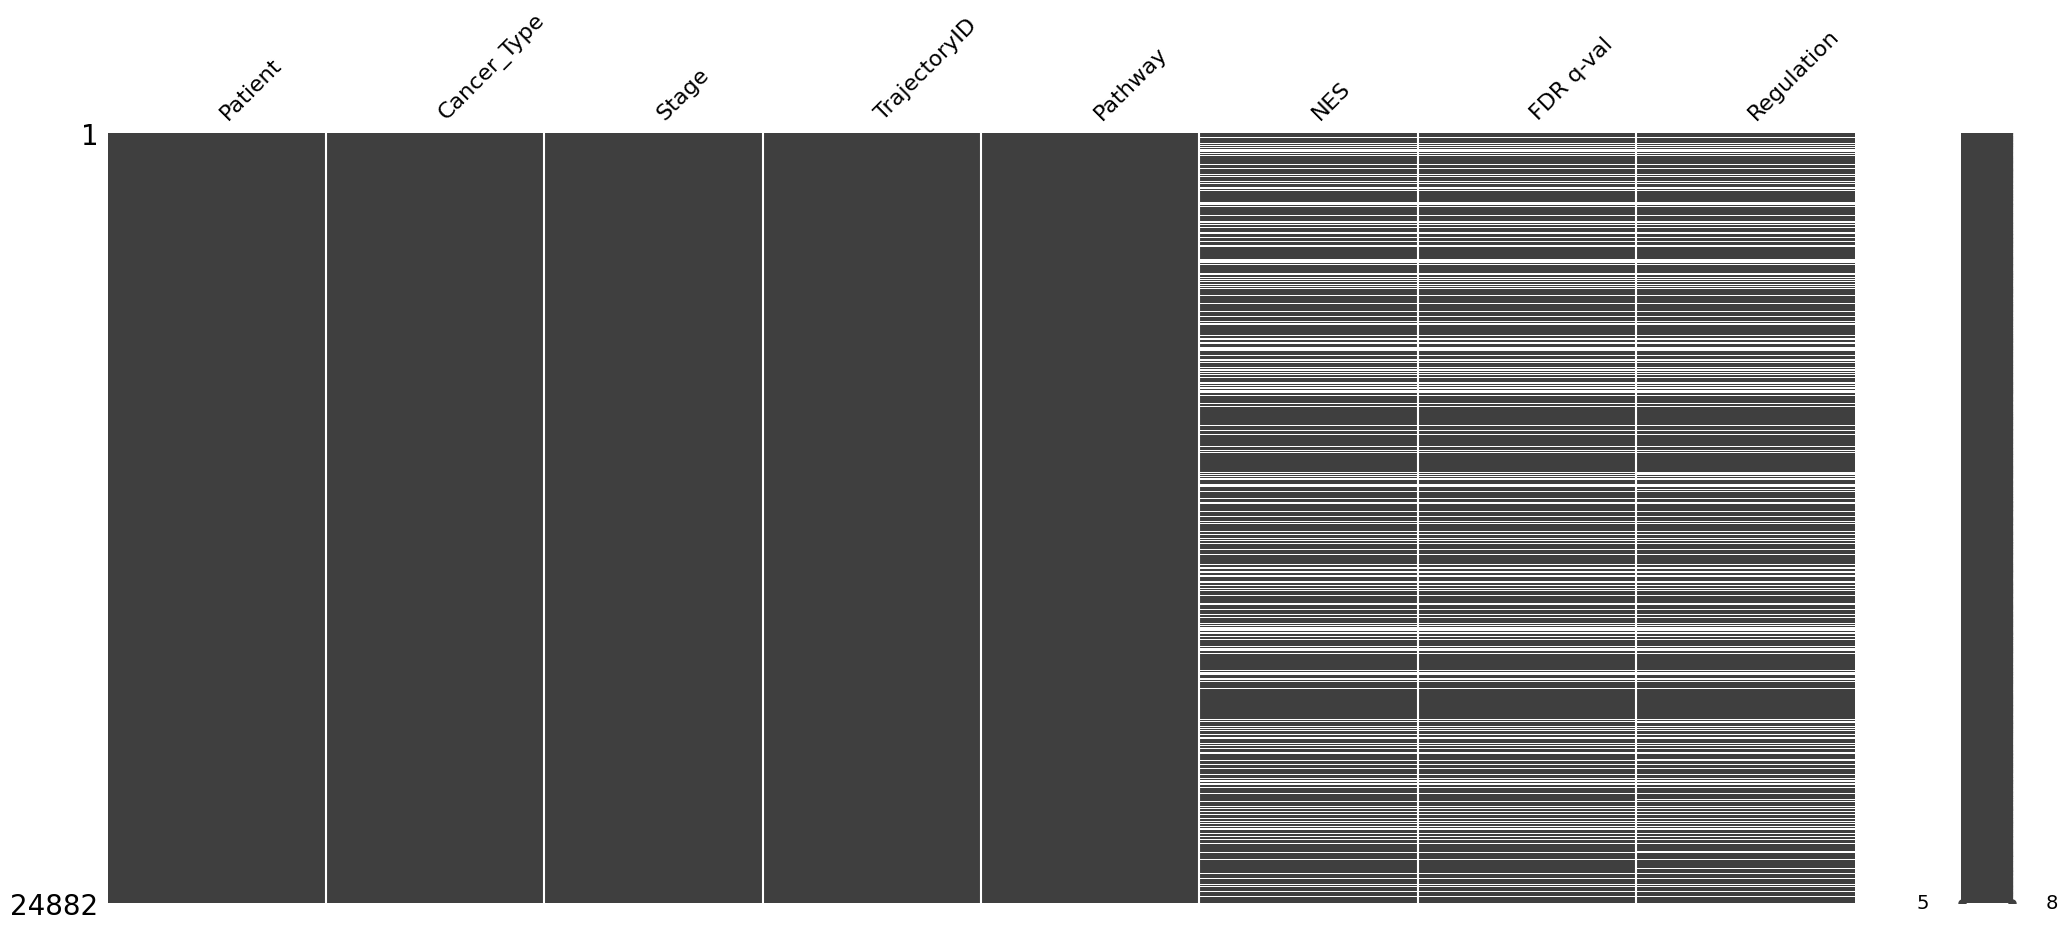

In [ ]:
mno.matrix(dataset)

In [ ]:
dataset.NES.value_counts()

---           164
-1.1359365      2
-1.1099644      2
-1.6036031      2
1.1313285       2
             ... 
0.9827361       1
1.1098586       1
0.66120803      1
0.643511        1
1.1056591       1
Name: NES, Length: 18709, dtype: int64

In [ ]:
dataset.Regulation.value_counts()

 0.0    16149
 1.0     2387
-1.0      176
Name: Regulation, dtype: int64

In [ ]:
# # Replace NaN values with the median value of each column
# for col in dataset.columns:
#     if dataset[col].dtype == 'object':
#         # Compute the median value of the column
#         values = dataset[col].dropna().unique()
#         values.sort()
#         median = values[len(values) // 2]

#         # Replace NaN values with the median value
#         dataset[col].fillna(median, inplace=True)
#     else:
#         dataset[col].fillna(dataset[col].median(), inplace=True)


In [ ]:
dataset.isnull().sum()

Patient            0
Cancer_Type        0
Stage              0
TrajectoryID       0
Pathway            0
NES             6006
FDR q-val       6006
Regulation      6170
dtype: int64

In [ ]:
dataset.head(8)

,Patient,Cancer_Type,Stage,TrajectoryID,Pathway,NES,FDR q-val,Regulation
0,TCGA-5L-AAT0-01,lobular,II,[49],DEVELOPMENTAL BIOLOGY,-0.92746407,0.877037,0.0
1,TCGA-5L-AAT0-01,lobular,II,[49],CIRCADIAN CLOCK,-1.4162418,0.630773,0.0
2,TCGA-5L-AAT0-01,lobular,II,[49],MUSCLE CONTRACTION,-1.327902,0.736391,0.0
3,TCGA-5L-AAT0-01,lobular,II,[49],TRANSPORT OF SMALL MOLECULES,-1.3203596,0.574472,0.0
4,TCGA-5L-AAT0-01,lobular,II,[49],IMMUNE SYSTEM,NaN,NaN,NaN
5,TCGA-5L-AAT0-01,lobular,II,[49],NEURONAL SYSTEM,-1.2194847,0.737521,0.0
6,TCGA-5L-AAT0-01,lobular,II,[49],CELL-CELL COMMUNICATION,-1.1843807,0.714842,0.0
7,TCGA-5L-AAT0-01,lobular,II,[49],REPRODUCTION,-1.156503,0.682508,0.0


## Training


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
for cancer_type in ["lobular", "ductal"]:
    # use only patients with this cancer type
    df = dataset[dataset["Cancer_Type"] == cancer_type]

    # keep only the columns of interest
    df = df[["Patient", "Stage", "Pathway", "NES", "FDR q-val", "Regulation"]]

    # convert '---' to NaN and rest of 'NES' column to numeric
    df["NES"] = pd.to_numeric(df["NES"], errors="coerce")

    # sort the dataframe in order to have pathways in the same order across patients
    # reset the index after sorting
    df = df.sort_values(by=["Patient", "Pathway"]).reset_index(drop=True)

    # df.to_csv(os.path.join(file_path, "data", cancer_type + ".csv"), index=False)

    stage_labels = []
    nes_values = []
    reg_values = []
    for row_num in range(0, len(df), 29):
        stage_labels.append(df["Stage"][row_num])
        nes_values.append(df["NES"][row_num : row_num + 29].values)
        reg_values.append(df["Regulation"][row_num : row_num + 29].values)

    X_train, X_test, y_train, y_test = train_test_split(
        nes_values,
        stage_labels,
        train_size=0.75,
        shuffle=True,
    )

    models_to_test = [
      HistGradientBoostingClassifier()
    ]

    print("\n", cancer_type)
    for model in models_to_test:
        model.fit(X_train, y_train)
        train_outputs = model.predict(X_train)
        test_outputs = model.predict(X_test)

        print(
            f"{model} - (train) weighted-f1: {f1_score(y_train, train_outputs, average='weighted'):.3f}, (test) weighted-f1: {f1_score(y_test, test_outputs, average='weighted'):.3f}"
        )


 lobular
HistGradientBoostingClassifier() - (train) weighted-f1: 1.000, (test) weighted-f1: 0.710

 ductal
HistGradientBoostingClassifier() - (train) weighted-f1: 1.000, (test) weighted-f1: 0.521


In [ ]:
for cancer_type in ["lobular", "ductal"]:
    # use only patients with this cancer type
    df = dataset[dataset["Cancer_Type"] == cancer_type]

    # keep only the columns of interest
    df = df[["Patient", "Stage", "Pathway", "NES", "FDR q-val", "Regulation"]]

    # convert '---' to NaN and rest of 'NES' column to numeric
    df["NES"] = pd.to_numeric(df["NES"], errors="coerce")

    # sort the dataframe to have pathways in the same order across patients
    # reset the index after sorting
    df = df.sort_values(by=["Patient", "Pathway"]).reset_index(drop=True)
    imputer = SimpleImputer(strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df[['NES']]), columns=['NES'])
    df['NES'] = df_imputed['NES']

    # Label encoding for the target variable 'Stage'
    label_encoder = LabelEncoder()
    df['Stage'] = label_encoder.fit_transform(df['Stage'])

    stage_labels = []
    nes_values = []
    reg_values = []
    for row_num in range(0, len(df), 29):
        stage_labels.append(df["Stage"][row_num])
        nes_values.append(df["NES"][row_num : row_num + 29].values)
        reg_values.append(df["Regulation"][row_num : row_num + 29].values)

    X_train, X_test, y_train, y_test = train_test_split(
        nes_values,
        stage_labels,
        train_size=0.75,
        shuffle=True,
    )

    models_to_test = [
        HistGradientBoostingClassifier(),
        # RandomForestClassifier(),
        XGBClassifier(),
    ]

    print("\n", cancer_type)
    for model in models_to_test:
        model.fit(X_train, y_train)
        train_outputs = model.predict(X_train)
        test_outputs = model.predict(X_test)

        print(
            f"{model.__class__.__name__} - (train) weighted-f1: {f1_score(y_train, train_outputs, average='weighted'):.3f}, (test) weighted-f1: {f1_score(y_test, test_outputs, average='weighted'):.3f}"
        )


 lobular
HistGradientBoostingClassifier - (train) weighted-f1: 1.000, (test) weighted-f1: 0.670
XGBClassifier - (train) weighted-f1: 1.000, (test) weighted-f1: 0.684

 ductal
HistGradientBoostingClassifier - (train) weighted-f1: 1.000, (test) weighted-f1: 0.562
XGBClassifier - (train) weighted-f1: 1.000, (test) weighted-f1: 0.570


HistGradientBoostingClassifier - (train) weighted-f1: 1.000, (test) weighted-f1: 0.434
XGBClassifier - (train) weighted-f1: 1.000, (test) weighted-f1: 0.508

 ductal
HistGradientBoostingClassifier - (train) weighted-f1: 1.000, (test) weighted-f1: 0.507
XGBClassifier - (train) weighted-f1: 1.000, (test) weighted-f1: 0.526


 lobular
HistGradientBoostingClassifier - (train) weighted-f1: 1.000, (test) weighted-f1: 0.589
XGBClassifier - (train) weighted-f1: 1.000, (test) weighted-f1: 0.541

 ductal
HistGradientBoostingClassifier - (train) weighted-f1: 1.000, (test) weighted-f1: 0.463
XGBClassifier - (train) weighted-f1: 1.000, (test) weighted-f1: 0.458


In [ ]:

for cancer_type in ["lobular", "ductal"]:
    # Select patients with this cancer type
    selected_data = dataset[dataset["Cancer_Type"] == cancer_type]

    # Keep only the relevant columns
    selected_data = selected_data[["Patient", "Stage", "Pathway", "NES", "FDR q-val", "Regulation"]]

    # Convert '---' to NaN and rest of 'NES' column to numeric
    selected_data["NES"] = pd.to_numeric(selected_data["NES"], errors="coerce")

    # Sort the dataframe to have pathways in the same order across patients
    # Reset the index after sorting
    selected_data = selected_data.sort_values(by=["Patient", "Pathway"]).reset_index(drop=True)

    # Impute missing values in the dataset
    imputer = SimpleImputer(strategy='mean')
    selected_data_imputed = pd.DataFrame(imputer.fit_transform(selected_data[['NES', 'FDR q-val', 'Regulation']]), columns=['NES', 'FDR q-val', 'Regulation'])
    selected_data[['NES', 'FDR q-val', 'Regulation']] = selected_data_imputed[['NES', 'FDR q-val', 'Regulation']]

    # Label encoding for the target variable 'Stage'
    label_encoder = LabelEncoder()
    selected_data['Stage'] = label_encoder.fit_transform(selected_data['Stage'])

    # Extract 'nes_values' and 'reg_values'
    selected_nes_values = [selected_data["NES"][i:i + 29].values for i in range(0, len(selected_data), 29)]
    selected_reg_values = [selected_data["Regulation"][i:i + 29].values for i in range(0, len(selected_data), 29)]
    selected_fdr_values = [selected_data["FDR q-val"][i:i + 29].values for i in range(0, len(selected_data), 29)]
    # selected_stages = [selected_data['Stage'][i:i + 29].values[0] for i in range(0, len(selected_data), 29)]

    # features = pd.concat([pd.DataFrame(selected_nes_values), pd.DataFrame(selected_reg_values), pd.DataFrame(selected_fdr_values)], axis=1)
    features = pd.concat([
        pd.DataFrame(selected_nes_values, columns=[f'nes_{i}' for i in range(29)]),
        pd.DataFrame(selected_reg_values, columns=[f'reg_{i}' for i in range(29)]),
        selected_data['FDR q-val']
    ], axis=1)


    X_train, X_test, y_train, y_test = train_test_split(
        features,
        selected_data['Stage'],
        train_size=0.75,
        shuffle=True,
    )

    models_to_test = [
        HistGradientBoostingClassifier(),
        XGBClassifier(),
        LGBMClassifier(),
    ]

    print("\n", cancer_type)
    for model in models_to_test:
        model.fit(X_train, y_train)
        train_outputs = model.predict(X_train)
        test_outputs = model.predict(X_test)

        print(
            f"{model.__class__.__name__} - (train) weighted-f1: {f1_score(y_train, train_outputs, average='weighted'):.3f}, (test) weighted-f1: {f1_score(y_test, test_outputs, average='weighted'):.3f}"
        )


 lobular
HistGradientBoostingClassifier - (train) weighted-f1: 0.555, (test) weighted-f1: 0.501
XGBClassifier - (train) weighted-f1: 0.562, (test) weighted-f1: 0.497
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1309
[LightGBM] [Info] Number of data points in the train set: 3675, number of used features: 59
[LightGBM] [Info] Start training from score -2.000718
[LightGBM] [Info] Start training from score -0.421097
[LightGBM] [Info] Start training from score -1.568126
LGBMClassifier - (train) weighted-f1: 0.563, (test) weighted-f1: 0.495

 ductal
HistGradientBoostingClassifier - (train) weighted-f1: 0.529, (test) weighted-f1: 0.511
XGBClassifier - (train) weighted-f1: 0.537, (test) weighted-f1: 0.511
[LightGBM] [Warning] Found whitespace in feature_names, replace wi

In [ ]:
import pandas as pd

# Assuming your DataFrame is named df
# Replace "Patient", "Pathway", "NES", "FDR q-val", "Regulation" with your actual column names

# Pivot the DataFrame with a custom aggregation function
wide_df = dataset.pivot_table(index=["Patient", "Cancer_Type", "Stage", "TrajectoryID"],
                         columns="Pathway",
                         values=["NES", "FDR q-val", "Regulation"],
                         aggfunc=lambda x: x.tolist())

# Flatten the multi-level columns
wide_df.columns = ['_'.join(map(str, col)) for col in wide_df.columns.values]

# Reset the index to have "Patient", "Cancer_Type", "Stage", and "TrajectoryID" as regular columns
wide_df.reset_index(inplace=True)

# Display the resulting DataFrame
# print(wide_df.head)


In [ ]:
wide_df.head(8)

,Patient,Cancer_Type,Stage,TrajectoryID,FDR q-val_AUTOPHAGY,FDR q-val_CELL CYCLE,FDR q-val_CELL-CELL COMMUNICATION,FDR q-val_CELLULAR RESPONSES TO STIMULI,FDR q-val_CHROMATIN ORGANIZATION,FDR q-val_CIRCADIAN CLOCK,...,Regulation_MUSCLE CONTRACTION,Regulation_NEURONAL SYSTEM,Regulation_ORGANELLE BIOGENESIS AND MAINTENANCE,Regulation_PROGRAMMED CELL DEATH,Regulation_PROTEIN LOCALIZATION,Regulation_REPRODUCTION,Regulation_SENSORY PERCEPTION,Regulation_SIGNAL TRANSDUCTION,Regulation_TRANSPORT OF SMALL MOLECULES,Regulation_VESICLE-MEDIATED TRANSPORT
0,TCGA-3C-AALI-01,ductal,II,[563],[1.0],[0.0],[1.0],[1.0],[0.9998564],[1.0],...,[0.0],[0.0],[0.0],[0.0],[0.0],[1.0],[0.0],[nan],[0.0],[0.0]
1,TCGA-3C-AALJ-01,ductal,II,[599],[1.0],[0.0],[1.0],[1.0],[1.0],[1.0],...,[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[nan],[0.0],[0.0]
2,TCGA-3C-AALK-01,ductal,I,[432],[0.9869883],[0.0],[1.0],[1.0],[0.99973136],[0.7850495],...,[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[nan],[0.0],[0.0]
3,TCGA-5L-AAT0-01,lobular,II,[49],[1.0],[0.001],[0.71484184],[1.0],[1.0],[0.630773],...,[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[nan],[0.0],[0.0]
4,TCGA-A1-A0SD-01,ductal,II,[405],[1.0],[0.0],[1.0],[0.9826126],[1.0],[1.0],...,[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[nan],[0.0],[0.0]
5,TCGA-A1-A0SF-01,ductal,II,[602],[1.0],[0.0],[0.8483243],[0.9964301],[1.0],[0.9316667],...,[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[nan],[0.0],[0.0]
6,TCGA-A1-A0SH-01,ductal,II,[382],[1.0],[0.008980214],[1.0],[1.0],[0.9819255],[0.99891],...,[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[nan],[0.0],[0.0]
7,TCGA-A1-A0SI-01,ductal,II,[448],[1.0],[0.0],[1.0],[0.98724693],[1.0],[0.6435857],...,[-1.0],[0.0],[0.0],[0.0],[0.0],[-1.0],[0.0],[nan],[0.0],[0.0]


In [ ]:
df = pd.DataFrame(dataset)

# Merge the last 3 columns into a new 'metrics' column
df['Metrics'] = df[['NES', 'FDR q-val', 'Regulation']].apply(lambda x: ','.join(x.astype(str)), axis=1)

# Drop the last 3 columns
df = df.drop(['NES', 'FDR q-val', 'Regulation'], axis=1)

df_wide = df.pivot_table(index=['Patient', 'Cancer_Type', 'Stage', 'TrajectoryID'],
                         columns='Pathway',
                         values='Metrics',
                         aggfunc='first').reset_index()

# Reset column names
df_wide.columns.name = None

In [ ]:
df_wide.head(8)


,Patient,Cancer_Type,Stage,TrajectoryID,AUTOPHAGY,CELL CYCLE,CELL-CELL COMMUNICATION,CELLULAR RESPONSES TO STIMULI,CHROMATIN ORGANIZATION,CIRCADIAN CLOCK,...,MUSCLE CONTRACTION,NEURONAL SYSTEM,ORGANELLE BIOGENESIS AND MAINTENANCE,PROGRAMMED CELL DEATH,PROTEIN LOCALIZATION,REPRODUCTION,SENSORY PERCEPTION,SIGNAL TRANSDUCTION,TRANSPORT OF SMALL MOLECULES,VESICLE-MEDIATED TRANSPORT
0,TCGA-3C-AALI-01,ductal,II,[563],"-0.8464673,1.0,0.0","2.4987915,0.0,1.0","-0.89263225,1.0,0.0","-0.46613726,1.0,0.0","-0.3695542,0.9998564,0.0","-0.8306946,1.0,0.0",...,"-1.6305238,0.18291003,0.0","-1.2298987,0.8572703,0.0","0.8411693,0.91265553,0.0","-0.46836728,1.0,0.0","0.46000993,0.9994924,0.0","1.6185771,0.010783572,1.0","-1.026282,1.0,0.0","nan,nan,nan","-1.1234496,1.0,0.0","0.9352765,0.9576036,0.0"
1,TCGA-3C-AALJ-01,ductal,II,[599],"-0.5343539,1.0,0.0","2.498281,0.0,1.0","-1.1090562,1.0,0.0","-0.4897793,1.0,0.0","-0.48676214,1.0,0.0","-0.97697395,1.0,0.0",...,"-1.3834494,1.0,0.0","-0.9707516,0.9056344,0.0","0.78412324,0.84596425,0.0","-1.1050961,1.0,0.0","-0.35120395,0.99976015,0.0","1.3047491,0.17002502,0.0","-1.0346385,0.962984,0.0","nan,nan,nan","-1.2588801,1.0,0.0","0.93358755,0.6789543,0.0"
2,TCGA-3C-AALK-01,ductal,I,[432],"-0.5589999,0.9869883,0.0","2.2952955,0.0,1.0","0.8072401,1.0,0.0","0.6811527,1.0,0.0","0.44041213,0.99973136,0.0","-1.0334466,0.7850495,0.0",...,"-1.4255915,0.8736459,0.0","-0.9698485,0.6447395,0.0","0.78877026,1.0,0.0","-0.57242864,1.0,0.0","-0.98309964,0.69457906,0.0","-1.2706767,0.93903893,0.0","-1.2028862,0.62980366,0.0","nan,nan,nan","-1.0668083,0.84002155,0.0","0.91949064,1.0,0.0"
3,TCGA-5L-AAT0-01,lobular,II,[49],"-0.48604113,1.0,0.0","1.9586517,0.001,1.0","-1.1843807,0.71484184,0.0","-0.48519793,1.0,0.0","-0.46219692,1.0,0.0","-1.4162418,0.630773,0.0",...,"-1.327902,0.73639125,0.0","-1.2194847,0.73752147,0.0","-0.41964316,0.9988716,0.0","0.7301432,0.9209556,0.0","-0.74812436,1.0,0.0","-1.156503,0.6825079,0.0","-1.0179907,0.8486577,0.0","nan,nan,nan","-1.3203596,0.5744715,0.0","-0.952388,0.90674156,0.0"
4,TCGA-A1-A0SD-01,ductal,II,[405],"-0.70527357,1.0,0.0","2.3423808,0.0,1.0","0.8045743,1.0,0.0","0.6243138,0.9826126,0.0","0.6743912,1.0,0.0","-0.50945085,1.0,0.0",...,"-1.2660657,0.97431,0.0","-0.8073656,1.0,0.0","0.8767864,1.0,0.0","0.89325964,1.0,0.0","-0.6040881,1.0,0.0","0.8668197,1.0,0.0","-1.0410982,1.0,0.0","nan,nan,nan","-1.2000962,0.86415964,0.0","-0.754902,1.0,0.0"
5,TCGA-A1-A0SF-01,ductal,II,[602],"0.5499541,1.0,0.0","2.5037544,0.0,1.0","-1.0008448,0.8483243,0.0","0.5362084,0.9964301,0.0","0.6285814,1.0,0.0","-0.819654,0.9316667,0.0",...,"-1.6665126,0.14418793,0.0","-1.3466038,0.49221575,0.0","1.0537709,0.6214064,0.0","-0.5211312,0.9912337,0.0","-0.5550298,1.0,0.0","-1.0418401,0.8692437,0.0","-1.1975762,0.587625,0.0","nan,nan,nan","-1.5676552,0.17589276,0.0","0.7608668,1.0,0.0"
6,TCGA-A1-A0SH-01,ductal,II,[382],"-0.79867816,1.0,0.0","1.721648,0.008980214,1.0","-0.7314401,1.0,0.0","0.7001031,1.0,0.0","0.62757564,0.9819255,0.0","-0.4166283,0.99891,0.0",...,"-1.4151386,0.64679456,0.0","-0.78102684,1.0,0.0","0.6377024,1.0,0.0","-0.6053342,1.0,0.0","-0.78605646,1.0,0.0","-0.7883554,1.0,0.0","-1.263754,0.9758339,0.0","nan,nan,nan","-1.2209407,0.8498609,0.0","0.84481317,1.0,0.0"
7,TCGA-A1-A0SI-01,ductal,II,[448],"-0.5359142,1.0,0.0","2.3001578,0.0,1.0","-0.66428834,1.0,0.0","0.6188958,0.98724693,0.0","-0.31756946,1.0,0.0","-1.1210396,0.6435857,0.0",...,"-1.7500943,0.02848914,-1.0","-1.0599183,0.6208874,0.0","1.0150937,0.567004,0.0","0.7909003,1.0,0.0","-0.3327938,1.0,0.0","-1.833877,0.01914065,-1.0","-1.0911032,0.6241479,0.0","nan,nan,nan","-1.4279753,0.2592184,0.0","1.0478892,0.7030362,0.0"


## Training Exploration

### V1
Dataset characteristics:
* Divide between ductal and lobular cancer
* Remove all rows with at least 1 empty value (6170)
* Target: Stage
* Features: NES, Regulation, FDR q-val

---
Models:
* DecisionTree
* RandomForest
* SVC
* MLPClassifier

Specifics:
* No use of Pipelines

In [40]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Models to test
models_to_test = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    MLPClassifier(max_iter=1000),
]

for cancer_type in ["lobular", "ductal"]:
    dataset = pd.read_csv(("real_patients_enrichments.csv"), index_col=0)
    dataset['NES'] = pd.to_numeric(dataset['NES'], errors='coerce')
    df = dataset
    # Use only patients with this cancer type
    df = df[df["Cancer_Type"] == cancer_type]

    # Keep only the columns of interest and remove rows with NaN values
    df = df[["Patient", "Stage", "Pathway", "NES", "FDR q-val", "Regulation"]].dropna()

    features = df[["NES", "FDR q-val", "Regulation"]]
    stage_labels = LabelEncoder().fit_transform(df["Stage"])

    X_train, X_test, y_train, y_test = train_test_split(
        features,
        stage_labels,
        train_size=0.75,
        shuffle=True,
    )

    # Apply OneHotEncoding for 'Regulation' within a pipeline for each model
    # preprocessor = ColumnTransformer(
    #     transformers=[
    #         ('cat', categorical_transformer, ['Regulation'])
    #     ],
    #     remainder='passthrough'  # Leave the rest of the columns unchanged
    # )

    print("\n", cancer_type)
    for model in models_to_test:
        # Create a pipeline that first transforms the data and then fits the model
        # clf = make_pipeline(preprocessor, model)

        model.fit(X_train, y_train)
        train_outputs = model.predict(X_train)
        test_outputs = model.predict(X_test)

        print(
            f"{model.__class__.__name__} - (train) weighted-f1: {f1_score(y_train, train_outputs, average='weighted'):.3f}, "
            f"(test) weighted-f1: {f1_score(y_test, test_outputs, average='weighted'):.3f}"
        )



 lobular
DecisionTreeClassifier - (train) weighted-f1: 1.000, (test) weighted-f1: 0.471
RandomForestClassifier - (train) weighted-f1: 1.000, (test) weighted-f1: 0.476
SVC - (train) weighted-f1: 0.517, (test) weighted-f1: 0.498
MLPClassifier - (train) weighted-f1: 0.517, (test) weighted-f1: 0.498

 ductal
DecisionTreeClassifier - (train) weighted-f1: 1.000, (test) weighted-f1: 0.484
RandomForestClassifier - (train) weighted-f1: 1.000, (test) weighted-f1: 0.500
SVC - (train) weighted-f1: 0.510, (test) weighted-f1: 0.504
MLPClassifier - (train) weighted-f1: 0.510, (test) weighted-f1: 0.504


The results are pretty bad :(

### V2
Dataset characteristics:
* **Don't** Divide between ductal and lobular cancer
* Remove all rows with at least 1 empty value (6170)
* Target: Stage
* Features: NES, Regulation, FDR q-val

---
Models:
* DecisionTree
* RandomForest
* SVC
* MLPClassifier

Specifics:
* No use of Pipelines

In [41]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Models to test
models_to_test = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    MLPClassifier(max_iter=1000),
]

dataset = pd.read_csv(("real_patients_enrichments.csv"), index_col=0)
dataset['NES'] = pd.to_numeric(dataset['NES'], errors='coerce')
df = dataset
# Use only patients with this cancer type

# Keep only the columns of interest and remove rows with NaN values
df = df[["Patient", "Stage", "Pathway", "NES", "FDR q-val", "Regulation"]].dropna()

features = df[["NES", "FDR q-val", "Regulation"]]
stage_labels = LabelEncoder().fit_transform(df["Stage"])

X_train, X_test, y_train, y_test = train_test_split(
    features,
    stage_labels,
    train_size=0.75,
    shuffle=True,
)

for model in models_to_test:
    model.fit(X_train, y_train)
    train_outputs = model.predict(X_train)
    test_outputs = model.predict(X_test)

    print(
        f"{model.__class__.__name__} - (train) weighted-f1: {f1_score(y_train, train_outputs, average='weighted'):.3f}, "
        f"(test) weighted-f1: {f1_score(y_test, test_outputs, average='weighted'):.3f}"
    )


DecisionTreeClassifier - (train) weighted-f1: 1.000, (test) weighted-f1: 0.504
RandomForestClassifier - (train) weighted-f1: 1.000, (test) weighted-f1: 0.523
SVC - (train) weighted-f1: 0.508, (test) weighted-f1: 0.515
MLPClassifier - (train) weighted-f1: 0.508, (test) weighted-f1: 0.515


The results are a little bit better than before, but no scientific explanation for this.

## Experiment with dataset


### Create a dataset of 91 columns x 859 patients
The 91 columns represent all Metrics in combination with the pathways

In [22]:
def _pivotDataset():
  def list_aggregator(series):
    return series.tolist()

  wide_df = dataset.pivot_table(index=["Patient", "Cancer_Type", "Stage", "TrajectoryID"],
                          columns="Pathway",
                          values=["NES", "FDR q-val", "Regulation"],
                          aggfunc={'NES': list_aggregator, 'FDR q-val': list_aggregator, 'Regulation': list_aggregator})

  wide_df.columns = [f'{col[1]}_{col[0]}' for col in wide_df.columns]

  wide_df.reset_index(inplace=True)

  merged_df = wide_df.groupby(["Patient", "Cancer_Type", "Stage", "TrajectoryID"]).agg(lambda x: sum(x, []))

  merged_df.reset_index(inplace=True)

  prefixes = [
    'SIGNAL TRANSDUCTION', 'METABOLISM OF PROTEINS', 'TRANSCRIPTION', 'DISEASE',
    'DIGESTION AND ABSORPTION', 'METABOLISM', 'IMMUNE SYSTEM'
  ]

  # Generate a list of column names to drop
  columns_to_drop = [col for col in merged_df.columns if any(col.startswith(prefix) for prefix in prefixes)]

  # Drop the columns from the DataFrame
  merged_df = merged_df.drop(columns=columns_to_drop)
  return merged_df

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Function to replace each list with its mean, treating empty lists as NaN
def list_to_mean(x):
    return np.mean(x) if isinstance(x, list) and len(x) > 0 else np.nan

# Preprocessing features
features = merged_df.drop(columns=['Stage', 'Patient', 'Cancer_Type', 'TrajectoryID'])
for col in features.columns:
    features[col] = features[col].apply(list_to_mean)

# Preprocessing target
target = LabelEncoder().fit_transform(merged_df["Stage"])

# Imputing missing values
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

# List of models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()

}

# Training and evaluating each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.6221
Random Forest Accuracy: 0.6337
Gradient Boosting Accuracy: 0.5988
SVC Accuracy: 0.6395
KNN Accuracy: 0.5698
Decision Tree Accuracy: 0.4012


In [24]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# List of cancer types to train models on
cancer_types = ["lobular", "ductal"]

# Models dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Function to replace each list with its mean, treating empty lists as NaN
def list_to_mean(x):
    return np.mean(x) if isinstance(x, list) and len(x) > 0 else np.nan

# Iterate over each cancer type
for cancer_type in cancer_types:
    print(f"\nTraining models for Cancer Type: {cancer_type}")
    ds = _pivotDataset()

    # Filter dataset for the current cancer type
    df = ds[ds["Cancer_Type"] == cancer_type]

    # Assuming 'Stage' is your target variable
    features = df.drop(columns=['Stage', 'Patient', 'Cancer_Type', 'TrajectoryID'])
    for col in features.columns:
        features[col] = features[col].apply(list_to_mean)

    target = LabelEncoder().fit_transform(df["Stage"])

    # Imputing missing values
    imputer = SimpleImputer(strategy='mean')
    features_imputed = imputer.fit_transform(features)

    # Splitting the dataset
    X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

    # Training and evaluating each model for the current cancer type
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        print(f"{name} Accuracy: {accuracy:.4f}")



Training models for Cancer Type: lobular
Logistic Regression Accuracy: 0.5882
Random Forest Accuracy: 0.7353
Gradient Boosting Accuracy: 0.5588
SVC Accuracy: 0.7353
KNN Accuracy: 0.5882
Decision Tree Accuracy: 0.4412

Training models for Cancer Type: ductal
Logistic Regression Accuracy: 0.5652
Random Forest Accuracy: 0.6159
Gradient Boosting Accuracy: 0.5942
SVC Accuracy: 0.6159
KNN Accuracy: 0.6014
Decision Tree Accuracy: 0.4638


### Create a dataset with 33 columns

In [42]:
df = pd.DataFrame(dataset)

df['Metrics'] = df[['NES', 'FDR q-val', 'Regulation']].apply(lambda x: np.array(x), axis=1)

df = df.drop(['NES', 'FDR q-val', 'Regulation'], axis=1)

df_wide = df.pivot_table(index=['Patient', 'Cancer_Type', 'Stage', 'TrajectoryID'],
                         columns='Pathway',
                         values='Metrics',
                         aggfunc='first').reset_index()

In [49]:
df_wide.shape

(858, 33)

In [43]:
df_wide.head(8)

Pathway,Patient,Cancer_Type,Stage,TrajectoryID,AUTOPHAGY,CELL CYCLE,CELL-CELL COMMUNICATION,CELLULAR RESPONSES TO STIMULI,CHROMATIN ORGANIZATION,CIRCADIAN CLOCK,...,MUSCLE CONTRACTION,NEURONAL SYSTEM,ORGANELLE BIOGENESIS AND MAINTENANCE,PROGRAMMED CELL DEATH,PROTEIN LOCALIZATION,REPRODUCTION,SENSORY PERCEPTION,SIGNAL TRANSDUCTION,TRANSPORT OF SMALL MOLECULES,VESICLE-MEDIATED TRANSPORT
0,TCGA-3C-AALI-01,ductal,II,[563],"[-0.8464673, 1.0, 0.0]","[2.4987915, 0.0, 1.0]","[-0.89263225, 1.0, 0.0]","[-0.46613726, 1.0, 0.0]","[-0.3695542, 0.9998564, 0.0]","[-0.8306946, 1.0, 0.0]",...,"[-1.6305238, 0.18291003, 0.0]","[-1.2298987, 0.8572703, 0.0]","[0.8411693, 0.91265553, 0.0]","[-0.46836728, 1.0, 0.0]","[0.46000993, 0.9994924, 0.0]","[1.6185771, 0.010783572, 1.0]","[-1.026282, 1.0, 0.0]","[nan, nan, nan]","[-1.1234496, 1.0, 0.0]","[0.9352765, 0.9576036, 0.0]"
1,TCGA-3C-AALJ-01,ductal,II,[599],"[-0.5343539, 1.0, 0.0]","[2.498281, 0.0, 1.0]","[-1.1090562, 1.0, 0.0]","[-0.4897793, 1.0, 0.0]","[-0.48676214, 1.0, 0.0]","[-0.97697395, 1.0, 0.0]",...,"[-1.3834494, 1.0, 0.0]","[-0.9707516, 0.9056344, 0.0]","[0.78412324, 0.84596425, 0.0]","[-1.1050961, 1.0, 0.0]","[-0.35120395, 0.99976015, 0.0]","[1.3047491, 0.17002502, 0.0]","[-1.0346385, 0.962984, 0.0]","[nan, nan, nan]","[-1.2588801, 1.0, 0.0]","[0.93358755, 0.6789543, 0.0]"
2,TCGA-3C-AALK-01,ductal,I,[432],"[-0.5589999, 0.9869883, 0.0]","[2.2952955, 0.0, 1.0]","[0.8072401, 1.0, 0.0]","[0.6811527, 1.0, 0.0]","[0.44041213, 0.99973136, 0.0]","[-1.0334466, 0.7850495, 0.0]",...,"[-1.4255915, 0.8736459, 0.0]","[-0.9698485, 0.6447395, 0.0]","[0.78877026, 1.0, 0.0]","[-0.57242864, 1.0, 0.0]","[-0.98309964, 0.69457906, 0.0]","[-1.2706767, 0.93903893, 0.0]","[-1.2028862, 0.62980366, 0.0]","[nan, nan, nan]","[-1.0668083, 0.84002155, 0.0]","[0.91949064, 1.0, 0.0]"
3,TCGA-5L-AAT0-01,lobular,II,[49],"[-0.48604113, 1.0, 0.0]","[1.9586517, 0.001, 1.0]","[-1.1843807, 0.71484184, 0.0]","[-0.48519793, 1.0, 0.0]","[-0.46219692, 1.0, 0.0]","[-1.4162418, 0.630773, 0.0]",...,"[-1.327902, 0.73639125, 0.0]","[-1.2194847, 0.73752147, 0.0]","[-0.41964316, 0.9988716, 0.0]","[0.7301432, 0.9209556, 0.0]","[-0.74812436, 1.0, 0.0]","[-1.156503, 0.6825079, 0.0]","[-1.0179907, 0.8486577, 0.0]","[nan, nan, nan]","[-1.3203596, 0.5744715, 0.0]","[-0.952388, 0.90674156, 0.0]"
4,TCGA-A1-A0SD-01,ductal,II,[405],"[-0.70527357, 1.0, 0.0]","[2.3423808, 0.0, 1.0]","[0.8045743, 1.0, 0.0]","[0.6243138, 0.9826126, 0.0]","[0.6743912, 1.0, 0.0]","[-0.50945085, 1.0, 0.0]",...,"[-1.2660657, 0.97431, 0.0]","[-0.8073656, 1.0, 0.0]","[0.8767864, 1.0, 0.0]","[0.89325964, 1.0, 0.0]","[-0.6040881, 1.0, 0.0]","[0.8668197, 1.0, 0.0]","[-1.0410982, 1.0, 0.0]","[nan, nan, nan]","[-1.2000962, 0.86415964, 0.0]","[-0.754902, 1.0, 0.0]"
5,TCGA-A1-A0SF-01,ductal,II,[602],"[0.5499541, 1.0, 0.0]","[2.5037544, 0.0, 1.0]","[-1.0008448, 0.8483243, 0.0]","[0.5362084, 0.9964301, 0.0]","[0.6285814, 1.0, 0.0]","[-0.819654, 0.9316667, 0.0]",...,"[-1.6665126, 0.14418793, 0.0]","[-1.3466038, 0.49221575, 0.0]","[1.0537709, 0.6214064, 0.0]","[-0.5211312, 0.9912337, 0.0]","[-0.5550298, 1.0, 0.0]","[-1.0418401, 0.8692437, 0.0]","[-1.1975762, 0.587625, 0.0]","[nan, nan, nan]","[-1.5676552, 0.17589276, 0.0]","[0.7608668, 1.0, 0.0]"
6,TCGA-A1-A0SH-01,ductal,II,[382],"[-0.79867816, 1.0, 0.0]","[1.721648, 0.008980214, 1.0]","[-0.7314401, 1.0, 0.0]","[0.7001031, 1.0, 0.0]","[0.62757564, 0.9819255, 0.0]","[-0.4166283, 0.99891, 0.0]",...,"[-1.4151386, 0.64679456, 0.0]","[-0.78102684, 1.0, 0.0]","[0.6377024, 1.0, 0.0]","[-0.6053342, 1.0, 0.0]","[-0.78605646, 1.0, 0.0]","[-0.7883554, 1.0, 0.0]","[-1.263754, 0.9758339, 0.0]","[nan, nan, nan]","[-1.2209407, 0.8498609, 0.0]","[0.84481317, 1.0, 0.0]"
7,TCGA-A1-A0SI-01,ductal,II,[448],"[-0.5359142, 1.0, 0.0]","[2.3001578, 0.0, 1.0]","[-0.66428834, 1.0, 0.0]","[0.6188958, 0.98724693, 0.0]","[-0.31756946, 1.0, 0.0]","[-1.1210396, 0.6435857, 0.0]",...,"[-1.7500943, 0.02848914, -1.0]","[-1.0599183, 0.6208874, 0.0]","[1.0150937, 0.567004, 0

In [51]:
import numpy as np
import pandas as pd

# Assuming 'df_wide' is your DataFrame after transformation

# Initialize a list to store the count of NaN values for array columns
nan_count_list = []

# Iterate through each column to check for arrays and count NaNs within those arrays
for col in df_wide.columns:
    # Check if the column contains arrays by looking at the first non-null entry
    if isinstance(df_wide[col].dropna().iloc[0], np.ndarray):
        nan_count = 0  # Initialize NaN count for this column

        # Now, check each array in the column for NaN values and count them
        for arr in df_wide[col].dropna():
            nan_count += np.isnan(arr).sum()  # Add the count of NaNs in the current array to the total count

        # Append the column name and NaN count to the list
        nan_count_list.append({'Column': col, 'NaN Count': nan_count})

# Convert the list of dictionaries into a DataFrame for nicer display
nan_count_df = pd.DataFrame(nan_count_list)

# Display the DataFrame as a table
print(nan_count_df)


                                  Column  NaN Count
0                              AUTOPHAGY          0
1                             CELL CYCLE        182
2                CELL-CELL COMMUNICATION          0
3          CELLULAR RESPONSES TO STIMULI         98
4                 CHROMATIN ORGANIZATION          0
5                        CIRCADIAN CLOCK          0
6                  DEVELOPMENTAL BIOLOGY          0
7               DIGESTION AND ABSORPTION       2574
8                                DISEASE       2574
9                             DNA REPAIR          2
10                       DNA REPLICATION          0
11                             DRUG ADME          0
12     EXTRACELLULAR MATRIX ORGANIZATION          0
13       GENE EXPRESSION (TRANSCRIPTION)       2574
14                            HEMOSTASIS          4
15                         IMMUNE SYSTEM       2574
16                            METABOLISM       2574
17                METABOLISM OF PROTEINS       2574
18          

Ok, so there are 7 columns / biological pathways with total nan values:
* SIGNAL TRANSDUCTION
* METABOLISM OF PROTEINS
* GENE EXPRESSION (TRANSCRIPTION)
* DISEASE
* DIGESTION AND ABSORPTION
* METABOLISM
* IMMUNE SYSTEM

We can drop those columns entirely as they not offer any added value

In [ ]:
df_filtered = df_wide.drop('SIGNAL TRANSDUCTION', axis=1)
df_wide = df_wide.drop('METABOLISM OF PROTEINS', axis=1)
df_wide = df_wide.drop('GENE EXPRESSION (TRANSCRIPTION)', axis=1)
df_filtered = df_wide.drop('DISEASE', axis=1)
df_wide = df_wide.drop('DIGESTION AND ABSORPTION', axis=1)
df_wide = df_wide.drop('METABOLISM', axis=1)
df_wide = df_wide.drop('IMMUNE SYSTEM', axis=1)

In [ ]:
column_names = df_wide.columns.tolist()
print(column_names)

['Patient', 'Cancer_Type', 'Stage', 'TrajectoryID', 'AUTOPHAGY', 'CELL CYCLE', 'CELL-CELL COMMUNICATION', 'CELLULAR RESPONSES TO STIMULI', 'CHROMATIN ORGANIZATION', 'CIRCADIAN CLOCK', 'DEVELOPMENTAL BIOLOGY', 'DIGESTION AND ABSORPTION', 'DISEASE', 'DNA REPAIR', 'DNA REPLICATION', 'DRUG ADME', 'EXTRACELLULAR MATRIX ORGANIZATION', 'GENE EXPRESSION (TRANSCRIPTION)', 'HEMOSTASIS', 'IMMUNE SYSTEM', 'METABOLISM', 'METABOLISM OF PROTEINS', 'METABOLISM OF RNA', 'MUSCLE CONTRACTION', 'NEURONAL SYSTEM', 'ORGANELLE BIOGENESIS AND MAINTENANCE', 'PROGRAMMED CELL DEATH', 'PROTEIN LOCALIZATION', 'REPRODUCTION', 'SENSORY PERCEPTION', 'SIGNAL TRANSDUCTION', 'TRANSPORT OF SMALL MOLECULES', 'VESICLE-MEDIATED TRANSPORT']
